In [1]:
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
from keras.models import load_model
import joblib

# 경고 무시
warnings.filterwarnings('ignore')

#한글 처리를 위해 폰트 설정
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

In [ ]:
logit = joblib.load('./model/logit.model')
tree = joblib.load('./model/tree.model')
rf = joblib.load('./model/rf.model')
svm = joblib.load('./model/svm.model')
knn = joblib.load('./model/knn.model')
ann = joblib.load('./model/ann.model')
dnn = load_model('./model/dnn.model')
dnn.load_weights('./model/dnn.weight')

In [2]:
df = pd.read_csv('./csv/model_results.csv')
df

,Model,Best Score,Best Parameter,Precision,Recall,F1-score,TPR,FPR,AUC
0,Logit,0.787949,"{'clf__C': 0.1, 'clf__class_weight': 'balanced...",0.796682,0.758592,0.777170,0.758592,0.214067,0.85
1,Tree,0.714525,"{'clf__max_depth': 3, 'clf__max_leaf_nodes': 3...",0.622762,0.762745,0.685682,0.762745,0.318741,0.76
2,RF,0.748072,"{'clf__max_depth': 3, 'clf__max_leaf_nodes': 8...",0.887644,0.671992,0.764909,0.671992,0.165452,0.83
3,SVM,0.788968,"{'clf__C': 1000, 'clf__gamma': 0.0001, 'clf__k...",0.942221,0.639913,0.762185,0.639913,0.109517,0.85
4,KNN,0.768374,"{'clf__n_neighbors': 20, 'clf__p': 2, 'clf__we...",0.814874,0.778071,0.796047,0.778071,0.194317,0.87
5,ANN,0.745668,"{'clf__activation': 'relu', 'clf__alpha': 0.1,...",0.851841,0.848753,0.850294,0.848753,0.148700,0.93
6,DNN,0.784456,"{'clf__batch_size': 128, 'clf__epochs': 50, 'c...",0.831757,0.817714,0.824675,0.817714,0.171183,0.90


In [3]:
models = df.Model.values.tolist()
scores = df['Best Score'].values.tolist()
params = df['Best Parameter'].values.tolist()
print(models, '\n', scores, '\n', params)

['Logit', 'Tree', 'RF', 'SVM', 'KNN', 'ANN', 'DNN'] 
 [0.787949498, 0.714524981, 0.748071889, 0.788968278, 0.76837434, 0.745668283, 0.784456303] 
 ["{'clf__C': 0.1, 'clf__class_weight': 'balanced', 'clf__max_iter': 1000, 'clf__penalty': 'l2'}", "{'clf__max_depth': 3, 'clf__max_leaf_nodes': 3, 'clf__min_samples_split': 2}", "{'clf__max_depth': 3, 'clf__max_leaf_nodes': 8, 'clf__min_samples_split': 402, 'clf__n_estimators': 90}", "{'clf__C': 1000, 'clf__gamma': 0.0001, 'clf__kernel': 'linear'}", "{'clf__n_neighbors': 20, 'clf__p': 2, 'clf__weights': 'uniform'}", "{'clf__activation': 'relu', 'clf__alpha': 0.1, 'clf__hidden_layer_sizes': (50,)}", "{'clf__batch_size': 128, 'clf__epochs': 50, 'clf__optimizer': 'adam'}"]


최적의 알고리즘: SVM
최적의 정확도: 0.788968278


Text(0, 0.5, 'Accuracy')

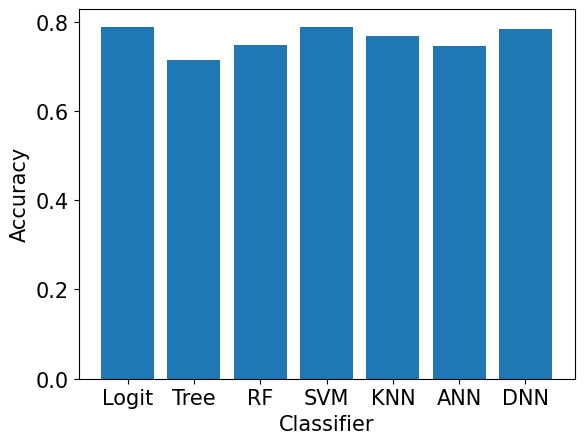

In [7]:
scores_arr=np.array(scores) # 검증용 데이터셋의 정확도
max_rate=np.max(scores_arr) # 가장 좋은 정확도
idx=np.argmax(scores_arr) # 최대값의 인덱스
print("최적의 알고리즘:", models[idx])
print("최적의 정확도:", max_rate)

plt.rcParams["font.size"]=15
plt.bar(models, scores_arr)
plt.xlabel("Classifier")
plt.ylabel("Accuracy")